## 1. Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay,
                             auc, roc_curve, roc_auc_score, RocCurveDisplay,
                             precision_recall_curve, PrecisionRecallDisplay,
                             precision_score, recall_score, f1_score,
                             accuracy_score
                             )

from scipy import stats

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_metadata =  pd.read_excel("Data/E Commerce Dataset.xlsx", usecols = "B:D", skiprows = 1)
df_metadata.rename({"Discerption":"Description"},axis=1,inplace=True)
df_metadata

,Data,Variable,Description
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [3]:
df = pd.read_excel("Data/E Commerce Dataset.xlsx", sheet_name = "E Comm")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## 2. Explore Data
### 2.1. Clean Data

In [4]:
# Check Missing Values
print("Missing Values:")
print(df.isnull().sum().sort_values(ascending=False))
print()

# Check Duplicate Values
print("Duplicate Rows:", df[df.duplicated()].shape[0])
print()

# Correct Inconsistent data
df["PreferredLoginDevice"] = df["PreferredLoginDevice"].replace({"Phone":"Mobile Phone"})
df["PreferredPaymentMode"] = df["PreferredPaymentMode"].replace({"CC":"Credit Card","COD": "Cash on Delivery"})

# Profile Columns
target_col = "Churn"
cat_nominal_col = df.select_dtypes(include="object").columns.to_list()  + ["Complain"]
cat_ordinal_col = ["CityTier","SatisfactionScore"]
categorical_col = cat_nominal_col + cat_ordinal_col
numerical_col = [i for i in df.columns.to_list() if (i not in [target_col,"CustomerID"]) and (i not in categorical_col)]

print("Qualitative Columns:", len(categorical_col))
print("Quantitative Columns:", len(numerical_col))

Missing Values:
DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

Duplicate Rows: 0

Qualitative Columns: 8
Quantitative Columns: 10


### 2.2. Explore Categorical Columns

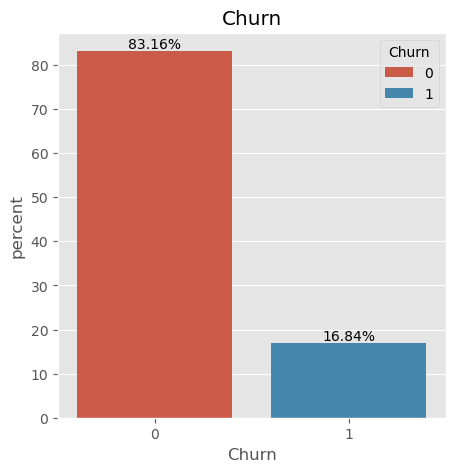

In [87]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(df, x=target_col, hue=target_col, stat="percent", ax=ax)
ax.set_title("Churn")
for bar in ax.containers:
    ax.bar_label(bar, fmt="{:.2f}%")
plt.show()

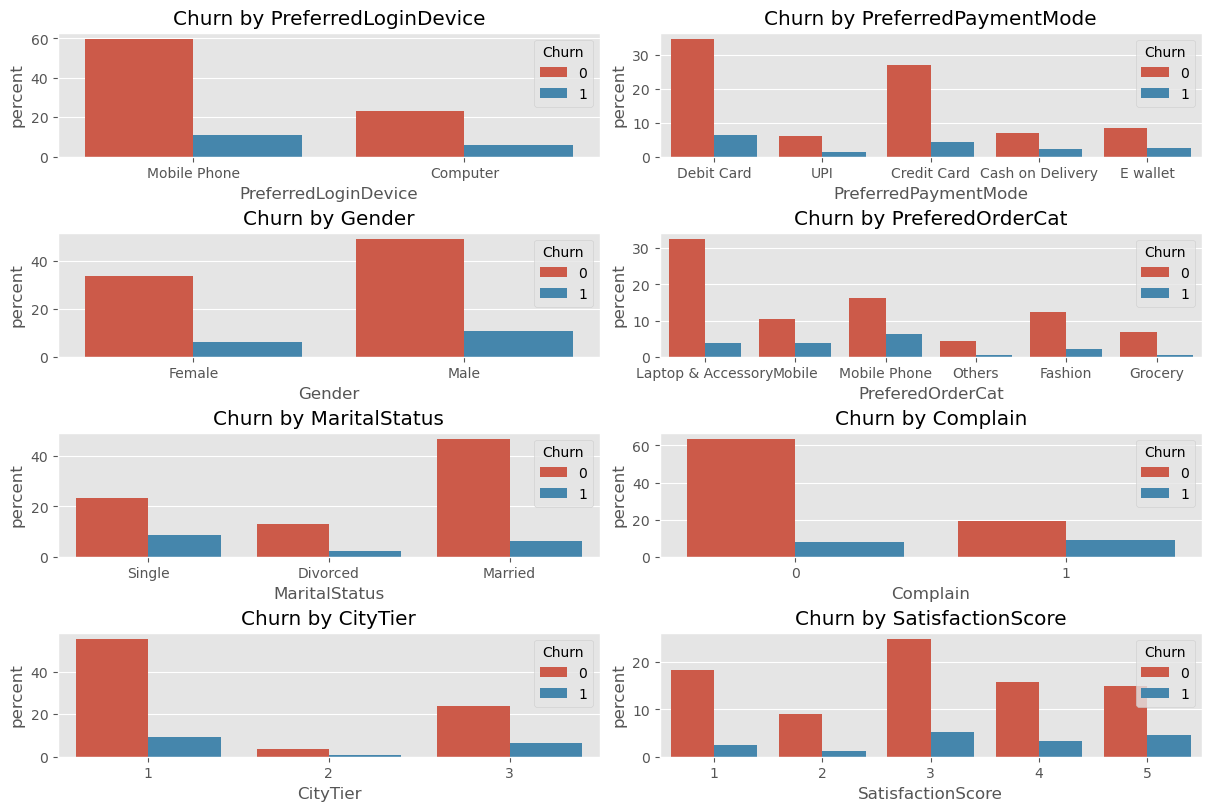

In [88]:
fig, axes = plt.subplots(ncols=2,nrows=round(len(categorical_col)/2), constrained_layout=True)
axes = axes.ravel()
for ax, col in zip(axes, categorical_col):
    sns.countplot(df,x=col,hue=target_col, stat="percent", ax=ax)
    ax.set_title(f"{target_col} by {col}")
plt.show()

Chi-Square Test of Association (alpha=0.1)

(Possibly) Has Association with Churn:
['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain', 'CityTier', 'SatisfactionScore']

(Possibly) Independent from Churn:
[]


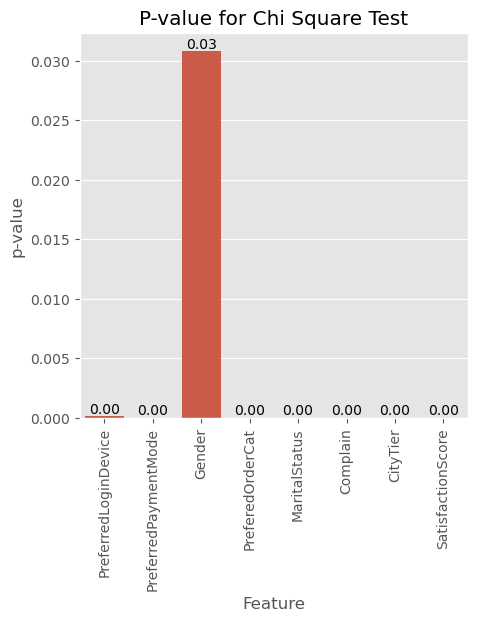

In [89]:
chi_result = {"Reject":[],"Fail to Reject":[]}
data_chi_result = {"Feature":[],"p-value":[]}
alpha = 0.1

for col in categorical_col:
    contingency_table = pd.crosstab(df[col], df[target_col], margins=False)
    res = stats.chi2_contingency(observed=contingency_table)
    data_chi_result["Feature"].append(col)
    data_chi_result["p-value"].append(res.pvalue)
    if res.pvalue < alpha:
        chi_result["Reject"].append(col)
    else:
        chi_result["Fail to Reject"].append(col)
    
print(f"Chi-Square Test of Association (alpha={alpha})\n")
print(f"(Possibly) Has Association with {target_col}:\n{chi_result["Reject"]}\n" )
print(f"(Possibly) Independent from {target_col}:\n{chi_result["Fail to Reject"]}" )


fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(data=pd.DataFrame(data_chi_result), x="Feature", y = "p-value")
ax.set_title("P-value for Chi Square Test")
ax.xaxis.set_tick_params(rotation = 90)
for bar in ax.containers:
    ax.bar_label(bar, fmt = lambda v: f"{v:.2f}")
plt.show()


### 2.2. Explore Quantitative Columns

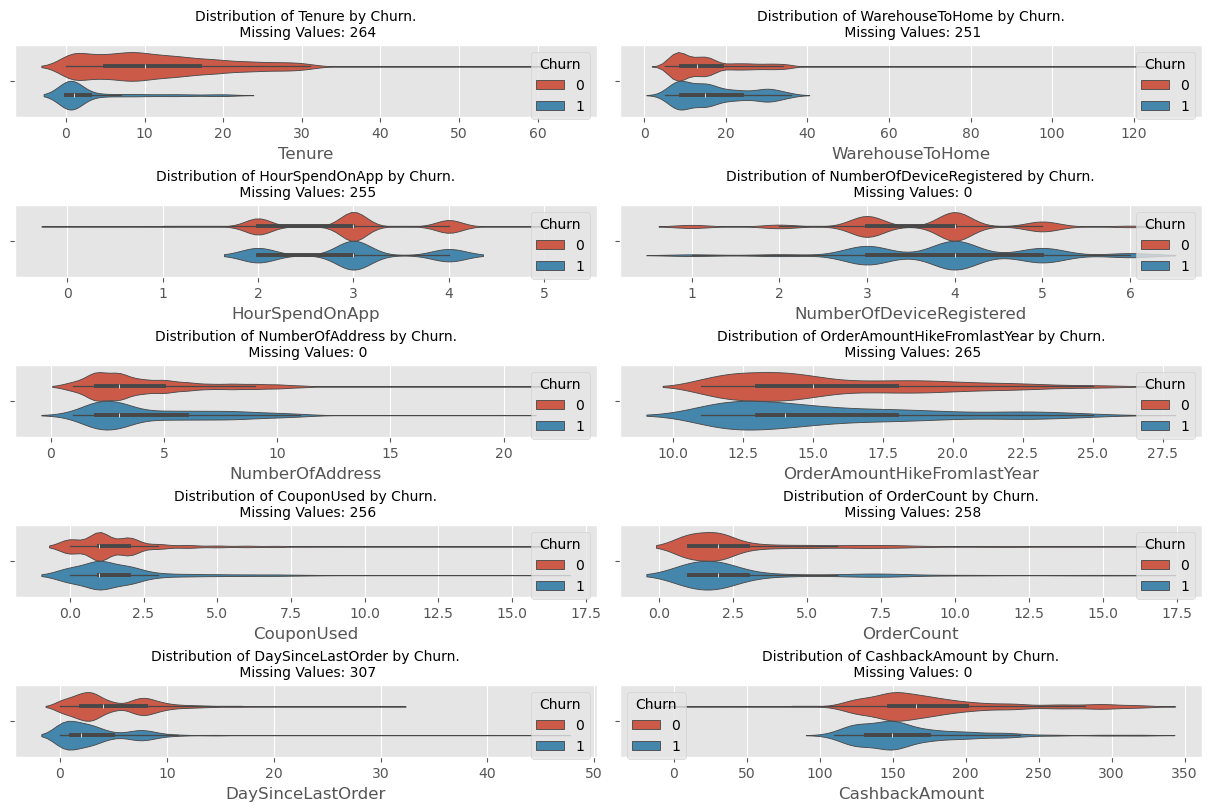

In [90]:
fig, axes = plt.subplots(ncols=2,nrows=round(len(numerical_col)/2), constrained_layout=True)
axes = axes.ravel()
for ax, col in zip(axes, numerical_col):
    sns.violinplot(df,x=col,hue=target_col, ax=ax)
    ax.set_title(f"Distribution of {col} by {target_col}.\n Missing Values: {df[df[col].isnull()].shape[0]}", fontdict={"fontsize":10})
plt.show()

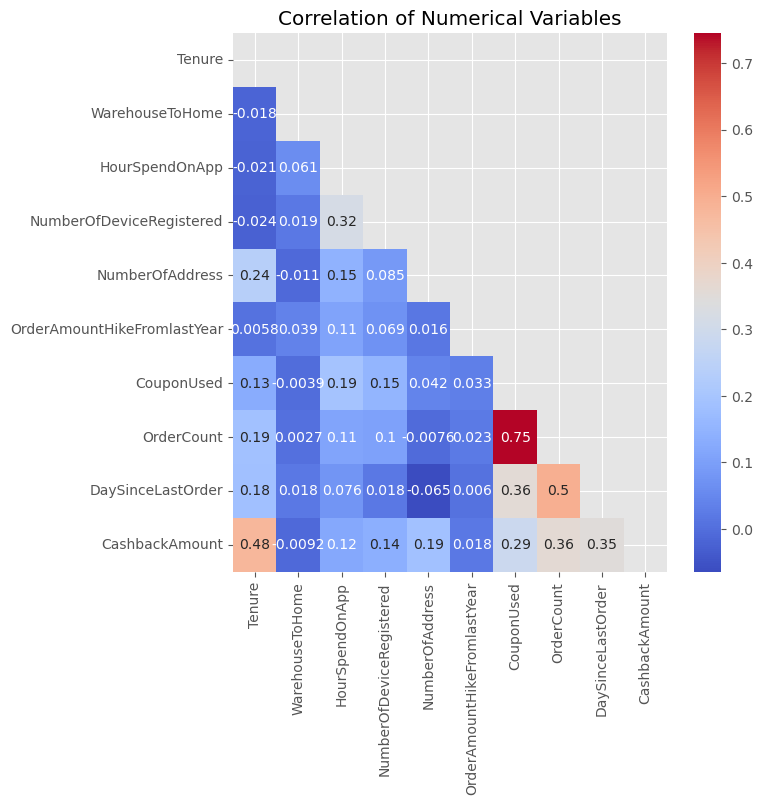

In [91]:
corr_matrix = df[numerical_col].corr()
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True,  cmap="coolwarm", mask = np.triu(corr_matrix), ax=ax)
ax.set_title("Correlation of Numerical Variables")
plt.show()

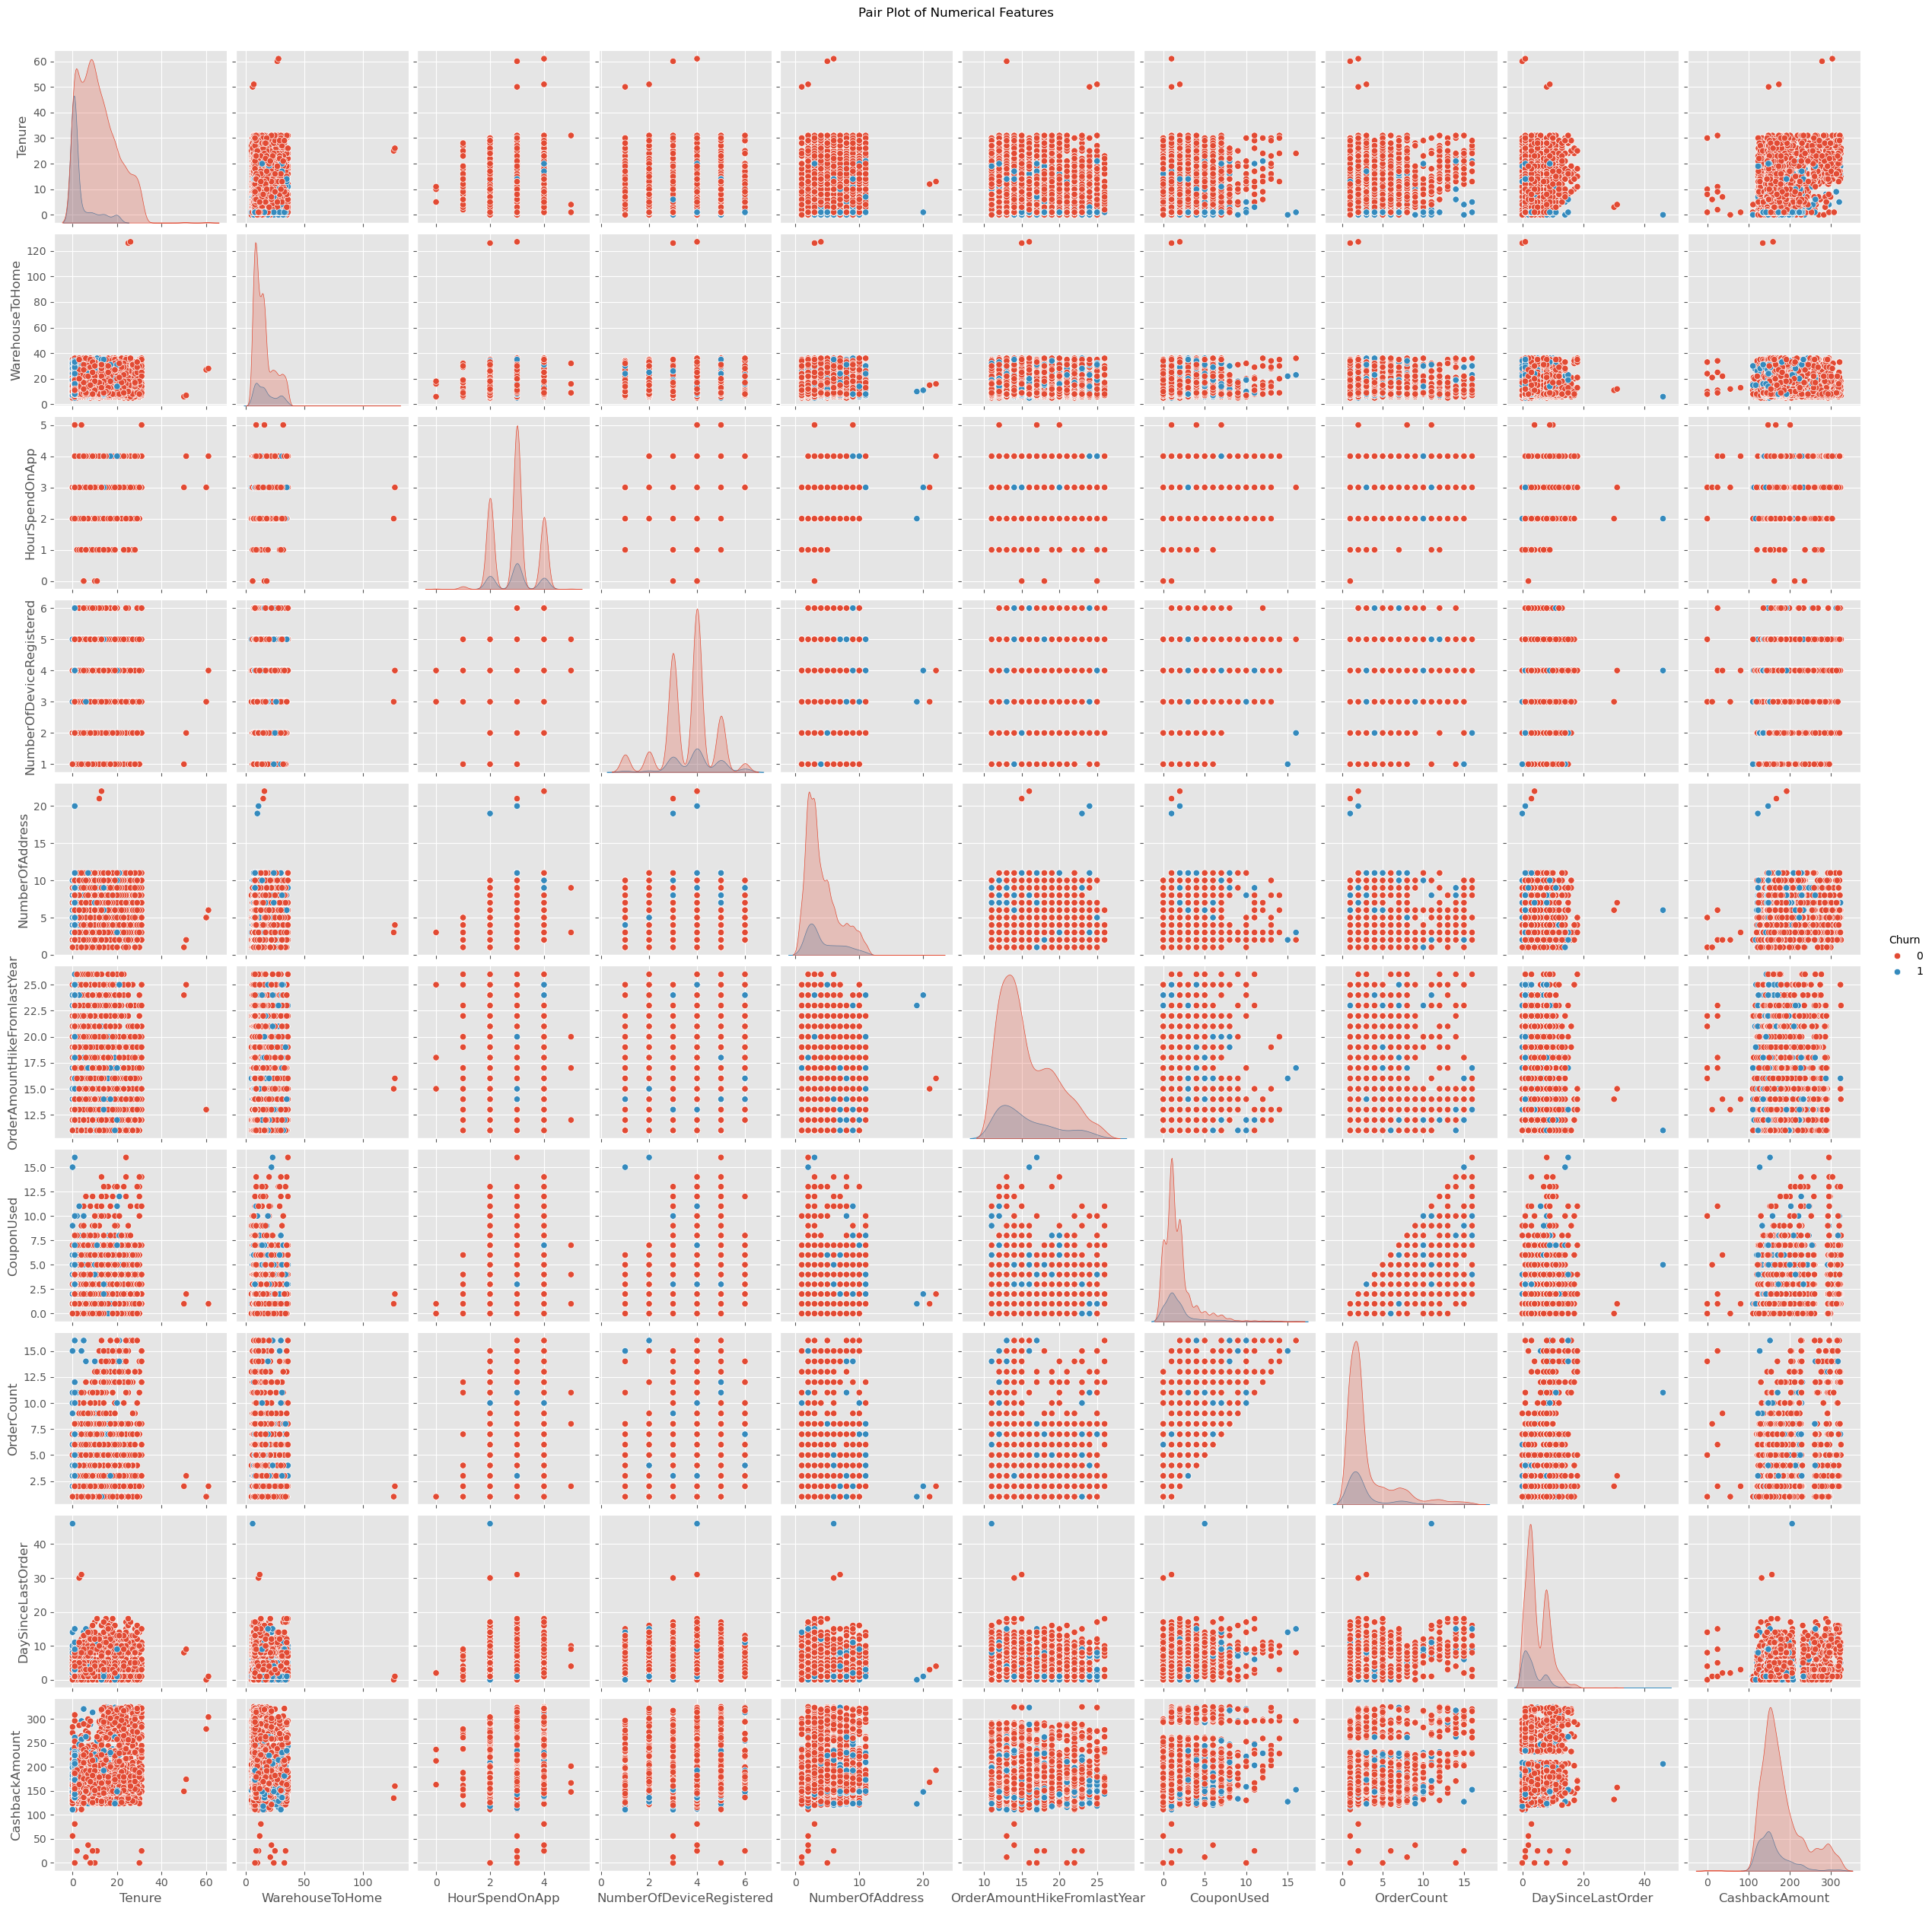

In [92]:
g = sns.pairplot(df,vars=numerical_col, hue=target_col)
g.fig.suptitle("Pair Plot of Numerical Features", y=1.01)
plt.show()

### 2.4. Split Training & Test Data

In [5]:
X = df[categorical_col + numerical_col]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=207)

print(f"Size of Train Set: {X_train.shape}")
print(f"Positive Case (Churned) in Train Set: {y_train.sum()*100.0/y_train.shape[0]:.2f}%")
print(f"Size of Test Set: {X_test.shape}")
print(f"Positive Case (Churned) in Test Set: {y_test.sum()*100.0/y_test.shape[0]:.2f}%")

Size of Train Set: (4785, 18)
Positive Case (Churned) in Train Set: 16.84%
Size of Test Set: (845, 18)
Positive Case (Churned) in Test Set: 16.80%


## 3. Model Building

In [ ]:
transformer_numeric = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median"))
        ,("scaler", StandardScaler())]
)
transformer_cat_nominal = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(drop="first")),
    ]
).set_output(transform = "default")

transformer_cat_ordinal = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder())
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("transformer_numeric", transformer_numeric, numerical_col),
        ("transformer_cat_nominal", transformer_cat_nominal, cat_nominal_col),
        ("transformer_cat_ordinal", transformer_cat_ordinal, cat_ordinal_col)
    ]
)
model_random_forest = RandomForestClassifier(random_state=20)
pipeline_random_forest = Pipeline(steps=
                                  [
                                        ('preprocessor', preprocessor),
                                        ('classifier', model_random_forest)
                                  ]
                                  )

param_grid = {
    'classifier__n_estimators' : [5, 10, 15, 25, 50, 75, 100],
    'classifier__max_depth': [5, 10, 20, 50, 75, 100],
    'classifier__max_features' : [None, "sqrt", "log2"]
}
grid_search = GridSearchCV(
    pipeline_random_forest, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1'
)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('transformer_numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'HourSpendOnApp',
                                                                          'NumberOfDeviceRegistered',
                                                                          'NumberOfAddress',
                                                                          'OrderAmountHikeFromlastYear',
                                                                          'CouponUsed',
                                                                          'OrderCount...
                                                                          'Complain']),
                                                                        ('transformer_cat_ordinal',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['CityTier',
                                                                          'SatisfactionScore'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=207))]),
             param_grid={'classifier__max_depth': [5, 10, 20, 50, 75, 100],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__n_estimators': [5, 10, 15, 25, 50, 75,
                                                      100]},
             scoring='f1')

In [153]:
# Get best parameters and score
print("Optimized for F1")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Analyze all results
cv_results = pd.DataFrame(grid_search.cv_results_).replace({None:"None"})

# Display mean test scores for each parameter combination
print("\nTop 5 parameter combinations by performance:")
cv_results[['param_classifier__n_estimators', 
            'param_classifier__max_depth', 
            'param_classifier__max_features', 
            'mean_test_score',
            'std_test_score',
            'mean_fit_time',
            'std_fit_time']]\
    .sort_values('mean_test_score', ascending=False).head()

Optimized for F1
Best parameters: {'classifier__max_depth': 20, 'classifier__max_features': None, 'classifier__n_estimators': 75}
Best cross-validation score: 0.8850

Top 5 parameter combinations by performance:


,param_classifier__n_estimators,param_classifier__max_depth,param_classifier__max_features,mean_test_score,std_test_score,mean_fit_time,std_fit_time
110,75,100,None,0.884998,0.022919,0.687517,0.019928
47,75,20,None,0.884998,0.022919,0.670187,0.022775
89,75,75,None,0.884998,0.022919,0.658020,0.006372
68,75,50,None,0.884998,0.022919,0.674703,0.021043
111,100,100,None,0.882838,0.019178,0.926515,0.027092


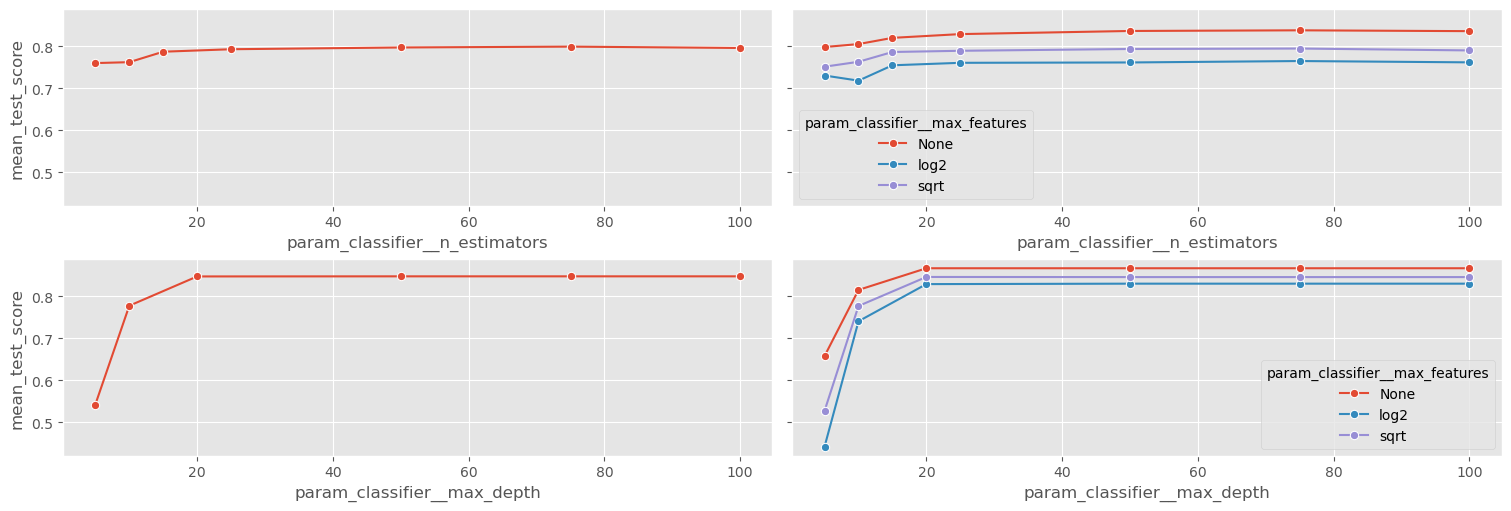

In [162]:
fig, axes =plt.subplots(nrows=2,ncols=2, figsize=(15, 10), constrained_layout= True, sharey = "all")
axes = axes.ravel()
fig.set_figheight(5)
sns.lineplot(cv_results.groupby(["param_classifier__n_estimators"])["mean_test_score"].mean().reset_index(), 
                x="param_classifier__n_estimators", 
                y="mean_test_score",
                marker="o",
                ax=axes[0])
sns.lineplot(cv_results.groupby(["param_classifier__n_estimators","param_classifier__max_features"])["mean_test_score"].mean().reset_index(), 
                x="param_classifier__n_estimators", 
                y="mean_test_score",
                hue="param_classifier__max_features",
                marker="o",
                ax=axes[1])

sns.lineplot(cv_results.groupby(["param_classifier__max_depth"])["mean_test_score"].mean().reset_index(), 
                x="param_classifier__max_depth", 
                y="mean_test_score",
                marker="o",
                ax=axes[2])
sns.lineplot(cv_results.groupby(["param_classifier__max_depth","param_classifier__max_features"])["mean_test_score"].mean().reset_index(), 
                x="param_classifier__max_depth", 
                y="mean_test_score",
                hue="param_classifier__max_features",
                marker="o",
                ax=axes[3])
plt.show()


In [170]:
model_random_forest_optimized = RandomForestClassifier(
    random_state= 207,
    n_estimators= 10,
    max_depth= 20,
    max_features= "sqrt",
)
pipeline_random_forest_optimized = Pipeline(steps=
                                  [
                                        ('preprocessor', preprocessor),
                                        ('classifier', model_random_forest_optimized)
                                  ]
                                  )
pipeline_random_forest_optimized.fit(X_train, y_train)
y_train_pred = pipeline_random_forest_optimized.predict(X_train)
y_train_pred_proba = pipeline_random_forest_optimized.predict_proba(X_train)

Classification Report
              precision    recall  f1-score   support

 Not Churned       1.00      1.00      1.00      3979
     Churned       1.00      0.99      0.99       806

    accuracy                           1.00      4785
   macro avg       1.00      0.99      1.00      4785
weighted avg       1.00      1.00      1.00      4785



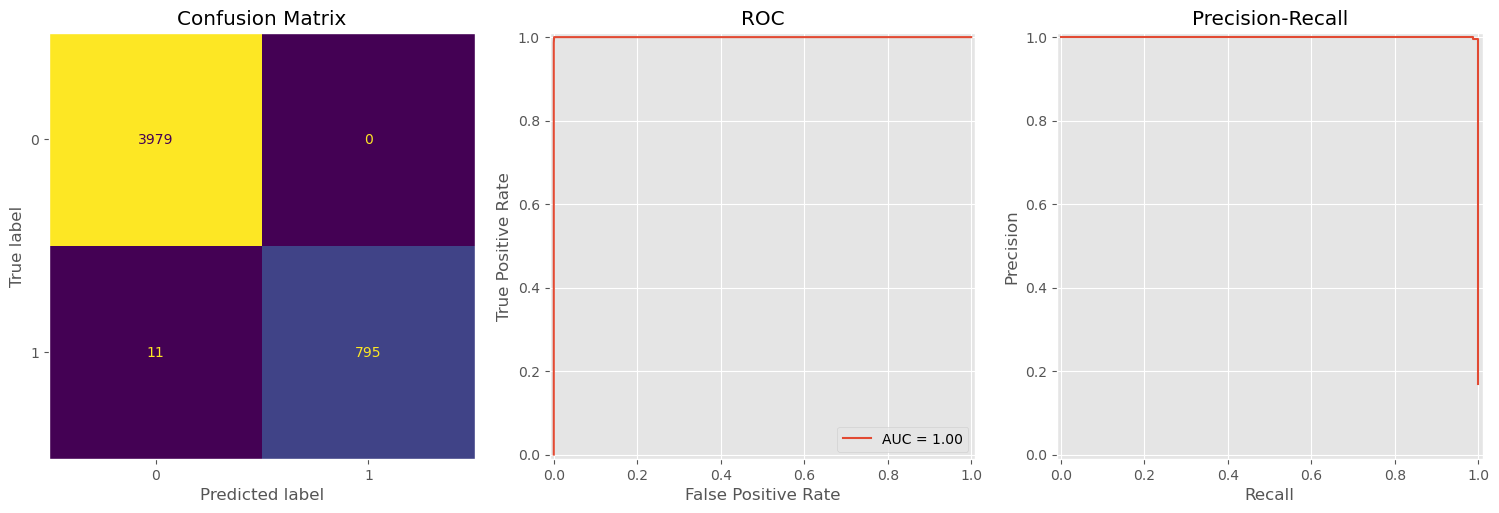

In [171]:
def plot_performance_metrics(y, y_pred, y_pred_proba):
    fig, ax = plt.subplots(ncols=3, constrained_layout=True)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    cm_display = ConfusionMatrixDisplay(cm)
    cm_display.plot(ax=ax[0], colorbar=False)
    ax[0].set_title('Confusion Matrix')
    ax[0].grid(False)
    # ROC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot(ax=ax[1])
    ax[1].set_title('ROC')
    # Precision Recall
    prec, recall, _ = precision_recall_curve(y, y_pred_proba)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
    pr_display.plot(ax=ax[2])
    ax[2].set_title('Precision-Recall')

print(f"Classification Report")
print(classification_report(y_train, y_train_pred, 
                            target_names=['Not Churned', 'Churned']))
plot_performance_metrics(y_train, y_train_pred, y_train_pred_proba.transpose()[1])


Classification Report
              precision    recall  f1-score   support

 Not Churned       0.95      0.99      0.97       703
     Churned       0.96      0.77      0.85       142

    accuracy                           0.96       845
   macro avg       0.96      0.88      0.91       845
weighted avg       0.96      0.96      0.95       845



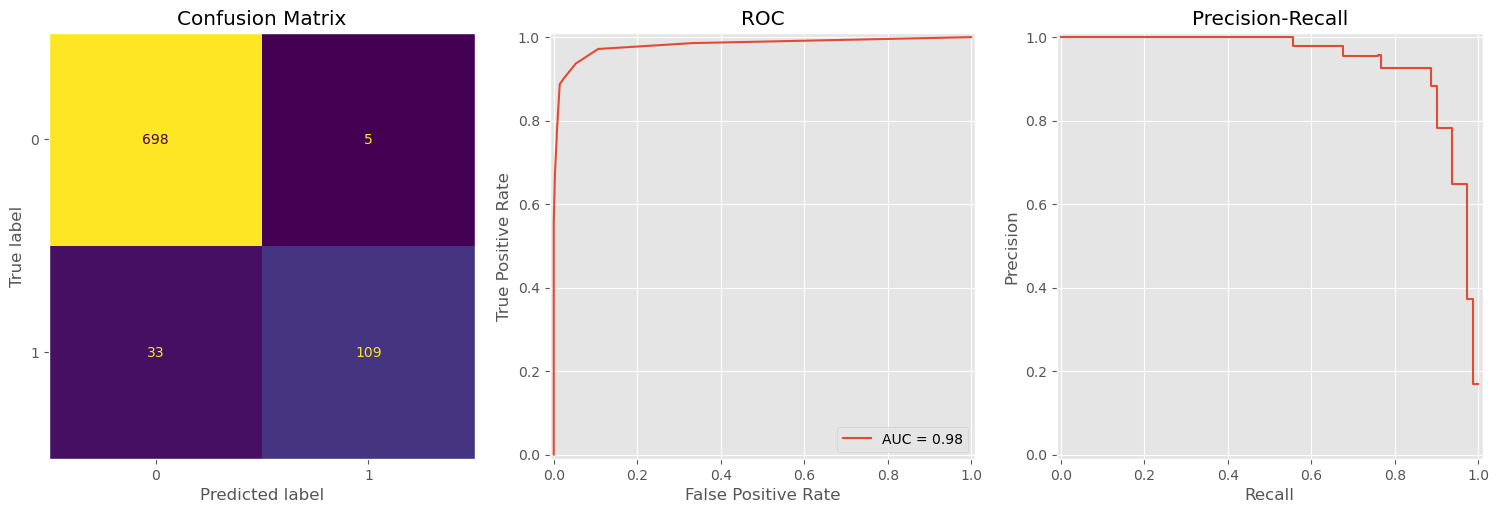

In [174]:
y_test_pred = pipeline_random_forest_optimized.predict(X_test)
y_test_pred_proba = pipeline_random_forest_optimized.predict_proba(X_test)

print(f"Classification Report")
print(classification_report(y_test, y_test_pred,
                            target_names=['Not Churned', 'Churned']))
plot_performance_metrics(y_test, y_test_pred, y_test_pred_proba.transpose()[1])

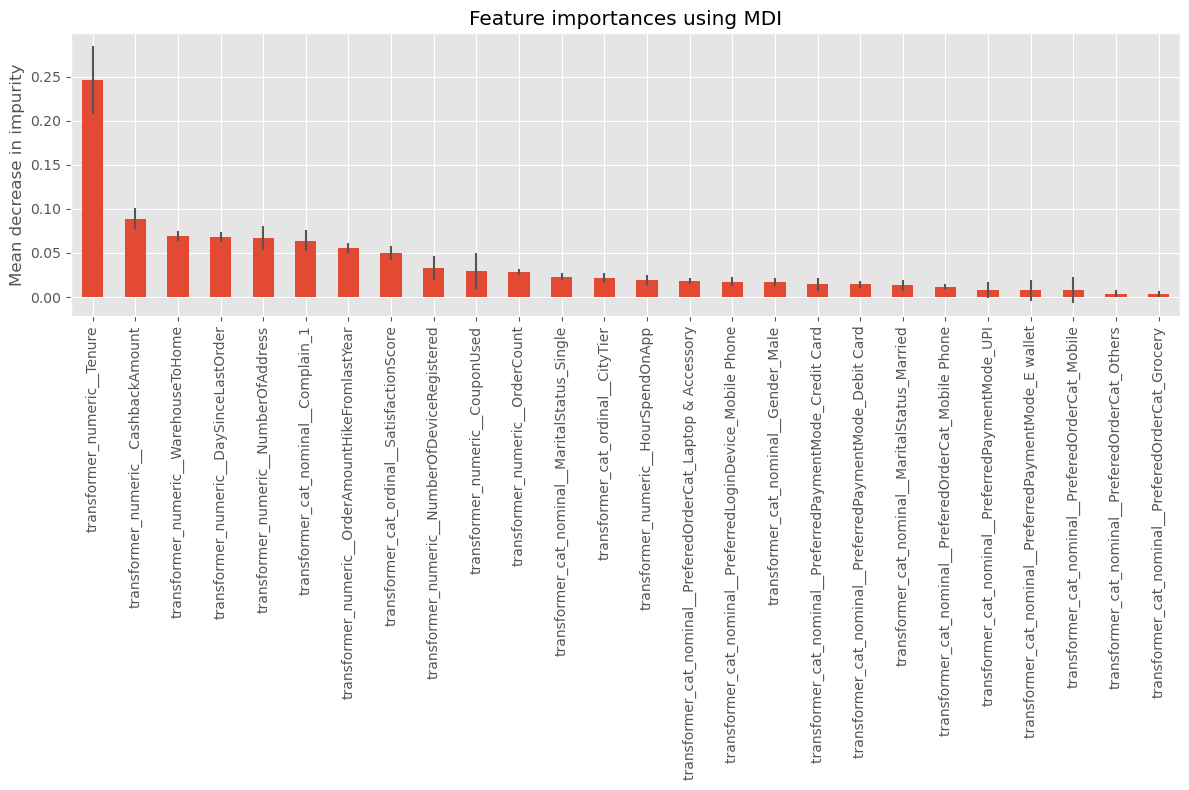

In [184]:
feature_names = pipeline_random_forest_optimized.named_steps["preprocessor"].get_feature_names_out()
importances = pipeline_random_forest_optimized.named_steps["classifier"].feature_importances_
importances_std = np.std([tree.feature_importances_ for tree in pipeline_random_forest_optimized.named_steps["classifier"].estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.xaxis.set_tick_params(labelrotation=90)
fig.tight_layout()